In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import random

import torch
import torch.nn as nn

# created library
import mydata
from mymodels import TransDataset, LoadDataset, ResNet50Model, VGG16Model, EfficientB7Model
from training import ModelTrainer

In [2]:
# to reproduce

seed = 42
random.seed(seed) #　ほかのモジュールで使われているかも
np.random.seed(seed) # ほかのモジュールで使われているかも
torch.manual_seed(seed) # Pytorchの中のシード
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True # GPUの計算過程の変化をさせない

# Efficientnet

In [3]:
db = "CelebA"
model_name = "efficientnet"
root = f"../../dataset/AAAI 2025/{db}/"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [4]:
ycol="labels"
batch_size = 8
ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (218, 178)


Validation Accuracy: 0.5895 | Loss: 0.6824 | F1: 0.6082
Validation Accuracy: 0.6678 | Loss: 0.6672 | F1: 0.6847
Validation Accuracy: 0.7310 | Loss: 0.6455 | F1: 0.7456
Validation Accuracy: 0.7816 | Loss: 0.6129 | F1: 0.7882
Validation Accuracy: 0.8205 | Loss: 0.5661 | F1: 0.8160
Validation Accuracy: 0.8425 | Loss: 0.5071 | F1: 0.8322
Validation Accuracy: 0.8379 | Loss: 0.4650 | F1: 0.8198
Validation Accuracy: 0.8458 | Loss: 0.4243 | F1: 0.8280
Validation Accuracy: 0.8543 | Loss: 0.3929 | F1: 0.8379
Validation Accuracy: 0.8580 | Loss: 0.3689 | F1: 0.8426
Validation Accuracy: 0.8646 | Loss: 0.3510 | F1: 0.8510
Validation Accuracy: 0.8711 | Loss: 0.3299 | F1: 0.8603
Validation Accuracy: 0.8754 | Loss: 0.3196 | F1: 0.8651
Validation Accuracy: 0.8941 | Loss: 0.2963 | F1: 0.8887
Validation Accuracy: 0.8932 | Loss: 0.2919 | F1: 0.8875
Validation Accuracy: 0.8955 | Loss: 0.2936 | F1: 0.8898
Validation Accuracy: 0.9011 | Loss: 0.2802 | F1: 0.8968
Validation Accuracy: 0.8983 | Loss: 0.2806 | F1:

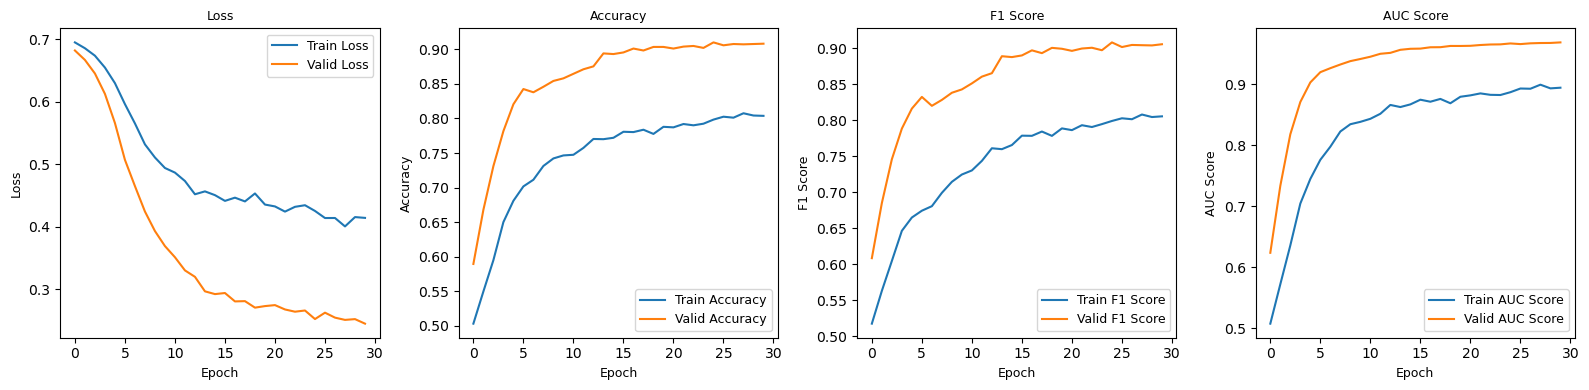

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = EfficientB7Model().to(device) # model -> GPU

# Train the model
num_epochs = 30
lr = 1e-6

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [6]:
model = EfficientB7Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1049
           1       0.95      0.86      0.91      1085

    accuracy                           0.91      2134
   macro avg       0.91      0.91      0.91      2134
weighted avg       0.91      0.91      0.91      2134

Skin tone 1: Accuracy 0.9090909090909091
Skin tone 2: Accuracy 0.9072164948453608


In [7]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1047
           1       0.94      0.87      0.90      1082

    accuracy                           0.91      2129
   macro avg       0.91      0.91      0.91      2129
weighted avg       0.91      0.91      0.91      2129

Skin tone 2: Accuracy 0.9035250463821892
Skin tone 1: Accuracy 0.9077069457659372


# Resnet

In [8]:
model_name = "resnet"
root = f"../../dataset/AAAI 2025/{db}/"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [9]:
ycol="labels"
batch_size = 8
ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (218, 178)


/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation Accuracy: 0.5234 | Loss: 0.6918 | F1: 0.6044
Validation Accuracy: 0.5637 | Loss: 0.6866 | F1: 0.6407
Validation Accuracy: 0.5731 | Loss: 0.6851 | F1: 0.6434
Validation Accuracy: 0.6026 | Loss: 0.6800 | F1: 0.6643
Validation Accuracy: 0.6321 | Loss: 0.6776 | F1: 0.6849
Validation Accuracy: 0.6504 | Loss: 0.6704 | F1: 0.7102
Validation Accuracy: 0.6931 | Loss: 0.6613 | F1: 0.7233
Validation Accuracy: 0.7165 | Loss: 0.6493 | F1: 0.7338
Validation Accuracy: 0.7441 | Loss: 0.6313 | F1: 0.7684
Validation Accuracy: 0.7844 | Loss: 0.5790 | F1: 0.7870
Validation Accuracy: 0.7849 | Loss: 0.5605 | F1: 0.7598
Validation Accuracy: 0.8182 | Loss: 0.4961 | F1: 0.8034
Validation Accuracy: 0.8238 | Loss: 0.4514 | F1: 0.8042
Validation Accuracy: 0.8130 | Loss: 0.4310 | F1: 0.7867
Validation Accuracy: 0.7634 | Loss: 0.4789 | F1: 0.7021
Validation Accuracy: 0.8285 | Loss: 0.3901 | F1: 0.8074
Validation Accuracy: 0.8519 | Loss: 0.3709 | F1: 0.8412
Validation Accuracy: 0.8018 | Loss: 0.4263 | F1:

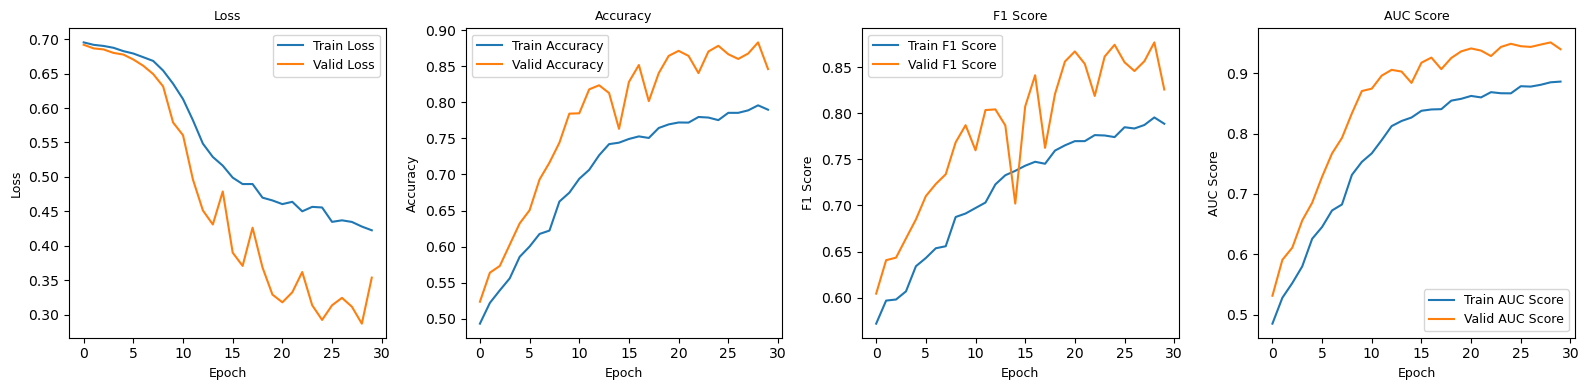

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50Model().to(device) # model -> GPU

# Train the model
num_epochs = 30
lr = 1e-6

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [11]:
model = ResNet50Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1049
           1       0.95      0.82      0.88      1085

    accuracy                           0.88      2134
   macro avg       0.89      0.88      0.88      2134
weighted avg       0.89      0.88      0.88      2134

Skin tone 1: Accuracy 0.887535145267104
Skin tone 2: Accuracy 0.8791002811621368


In [12]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1047
           1       0.93      0.80      0.86      1082

    accuracy                           0.87      2129
   macro avg       0.87      0.87      0.87      2129
weighted avg       0.87      0.87      0.87      2129

Skin tone 2: Accuracy 0.8617810760667903
Skin tone 1: Accuracy 0.8725023786869648


# VGG

In [21]:
model_name = "vgg"
root = f"../../dataset/AAAI 2025/{db}/"
model_save_directory = f"{root}/model/{model_name}/"
df_valid_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_valid_{model_name}.csv"
df_test_filepath = f"../../dataset/AAAI 2025/{db}/evaluation/df_test_{model_name}.csv"

df_train = mydata.load_and_process_csv(f"{root}/dataframe/df_train.csv")
df_valid = mydata.load_and_process_csv(f"{root}/dataframe/df_valid.csv")
df_test = mydata.load_and_process_csv(f"{root}/dataframe/df_test.csv")

In [22]:
ycol="labels"
batch_size = 8
ld = LoadDataset(df_train, df_valid, df_test, ycol, batch_size)
train_loader, valid_loader, test_loader = ld.create_dataloaders()

H*W:  (218, 178)


Validation Accuracy: 0.6345 | Loss: 0.6658 | F1: 0.5938
Validation Accuracy: 0.7755 | Loss: 0.5231 | F1: 0.7855
Validation Accuracy: 0.8083 | Loss: 0.4104 | F1: 0.7980
Validation Accuracy: 0.8365 | Loss: 0.3618 | F1: 0.8288
Validation Accuracy: 0.8552 | Loss: 0.3355 | F1: 0.8471
Validation Accuracy: 0.8683 | Loss: 0.3024 | F1: 0.8641
Validation Accuracy: 0.8693 | Loss: 0.2837 | F1: 0.8711
Validation Accuracy: 0.8800 | Loss: 0.2802 | F1: 0.8763
Validation Accuracy: 0.8768 | Loss: 0.2867 | F1: 0.8697
Validation Accuracy: 0.8908 | Loss: 0.2579 | F1: 0.8879
Validation Accuracy: 0.8875 | Loss: 0.2508 | F1: 0.8899
Validation Accuracy: 0.8993 | Loss: 0.2432 | F1: 0.8982
Validation Accuracy: 0.8946 | Loss: 0.2435 | F1: 0.8927
Validation Accuracy: 0.8941 | Loss: 0.2506 | F1: 0.8909
Validation Accuracy: 0.9011 | Loss: 0.2364 | F1: 0.9000
Validation Accuracy: 0.8969 | Loss: 0.2357 | F1: 0.8944
Validation Accuracy: 0.9025 | Loss: 0.2301 | F1: 0.9017
Validation Accuracy: 0.8903 | Loss: 0.2689 | F1:

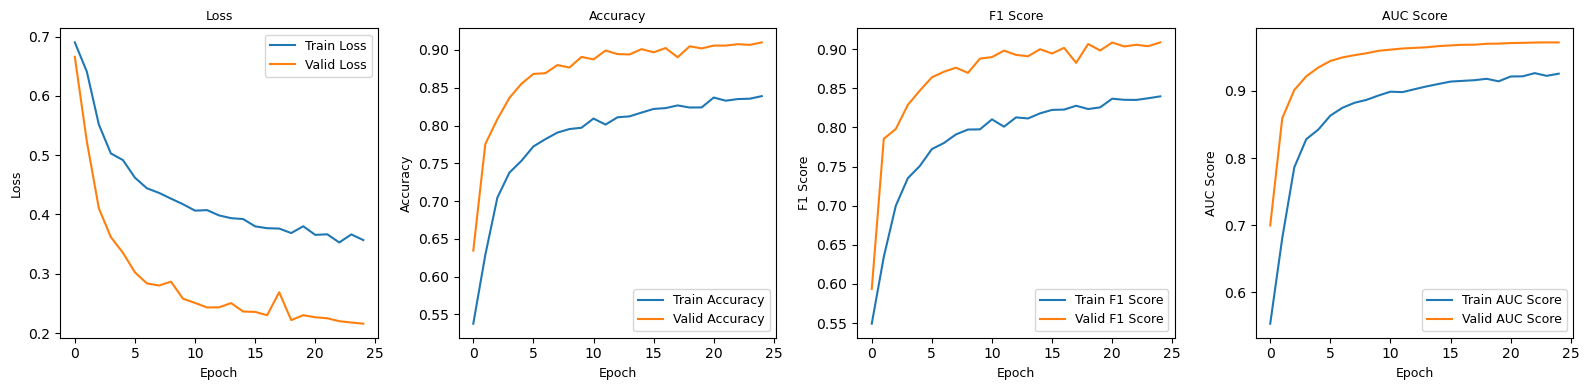

In [23]:
model = VGG16Model().to(device) # model -> GPU

# Train the model
num_epochs = 25
lr = 1e-6

trainer = ModelTrainer(model_save_directory)
best_val_file = trainer.train(model, train_loader, valid_loader, num_epochs=num_epochs, lr=lr)

In [25]:
model = VGG16Model().to(device) # model -> GPU
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
tmp = df_valid.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_valid_filepath, index=False)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1049
           1       0.94      0.88      0.91      1085

    accuracy                           0.91      2134
   macro avg       0.91      0.91      0.91      2134
weighted avg       0.91      0.91      0.91      2134

Skin tone 1: Accuracy 0.9268978444236177
Skin tone 2: Accuracy 0.8931583880037488


In [26]:
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
tmp = df_test.copy()
tmp["predictions"] = test_predictions
tmp["proba"] = test_outputs
trainer.report(tmp)
tmp.to_csv(df_test_filepath, index=False)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1047
           1       0.93      0.88      0.90      1082

    accuracy                           0.90      2129
   macro avg       0.91      0.90      0.90      2129
weighted avg       0.91      0.90      0.90      2129

Skin tone 2: Accuracy 0.8923933209647495
Skin tone 1: Accuracy 0.9162702188392008
